# Stack Overflow Survey EDA

In this project, I will analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. 

I will be using the following files:
1. survey_results_public.csv - CSV file with main survey results
2. survey_results_schema.csv - CSV file with survey schema

In [8]:
import pandas as pd

In [9]:
survey_raw_df = pd.read_csv("survey_results_public.csv")

In [10]:
# View data
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [11]:
# View columns 
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Shortcodes have been used as column names. We can refer to the schema file to see the full text of each question. 

In [12]:
schema_raw = pd.read_csv("survey_results_schema.csv", index_col="Column").QuestionText 

In [14]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

While the survey responses contain a wealth of information, I'll limit the analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Select a subset of columns with the relevant data for our analysis.

In [15]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [16]:
len(selected_columns)

20

In [17]:
# Make a copy
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
schema = schema_raw[selected_columns]
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [19]:
survey_df.shape

(64461, 20)

In [20]:
schema.shape

(20,)

In [21]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the non-null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value.

In [22]:
print(schema.Age1stCode)
print(schema.YearsCode)
print(schema.YearsCodePro)

At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)
Including any education, how many years have you been coding in total?
NOT including education, how many years have you coded professionally (as a part of your work)?


In [23]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [75]:
survey_df.YearsCode.unique()

array([36.,  7.,  4., 15.,  6., 17.,  8., 10., 35.,  5., 37., 19.,  9.,
       22., 30., 23., 20.,  2., nan,  3., 13., 25., 16., 43., 11., 38.,
       33., 24., 21., 12., 40., 50., 46., 14., 18., 28., 32., 44., 26.,
       42., 31., 34., 29.,  1., 27., 39., 41., 45., 47., 49., 48.])

In [77]:
survey_df.YearsCodePro.unique()

array([27.,  4., nan,  8., 13.,  2.,  7., 20.,  1., 23.,  3., 12., 17.,
       18., 10., 14., 29.,  6., 28.,  9., 15., 11., 16., 25.,  5., 21.,
       19., 35., 24., 32., 22., 30., 38., 26., 40., 33., 31., 34., 36.,
       39., 37., 41., 45., 47., 42., 46., 50., 43., 44., 48., 49.])

In [76]:
survey_df["Age1stCode"] = pd.to_numeric(survey_df.Age1stCode, errors="coerce")
survey_df["YearsCode"] = pd.to_numeric(survey_df.YearsCode, errors="coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df.YearsCodePro, errors="coerce")

In [26]:
# View statistics 
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. Responses may contain invalid values due to accidental or intentional errors while responding. Thus, ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.

In [27]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Ignore entries where the value for the column is higher than 140 hours.

In [28]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [29]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


The gender column also allows for picking multiple options. Remove values containing more than one option to simplify analysis.

In [31]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [32]:
survey_df["Gender"].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [34]:
import numpy as np 
survey_df.where(~(survey_df.Gender.str.contains(";", na=False)), np.nan, inplace=True)
survey_df["Gender"].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [35]:
# View sample of data 
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
46845,United States,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,6.0,2.0,Bash/Shell/PowerShell;Go;Java;JavaScript;Pytho...,Bash/Shell/PowerShell;Go;Python;Rust;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Somewhat important
53406,Indonesia,21.0,Woman,"Secondary school (e.g. American high school, G...",NaN,Yes,21.0,1.0,NaN,HTML/CSS,HTML/CSS,Every few months,Call a coworker or friend;Visit another develo...,Student,NaN,NaN,NaN,Opportunities for professional development,NaN,NaN
45344,Republic of Moldova,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
2927,United States,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,10.0,10.0,6.0,C#;Go;HTML/CSS;Java;JavaScript;TypeScript,Kotlin;Python;Rust,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Engineering manager;Syst...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
4404,Georgia,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,12.0,12.0,Java;JavaScript;Python;SQL;TypeScript,Java;JavaScript;Python;SQL;TypeScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",50.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
46298,Austria,55.0,Man,Some college/university study without earning ...,NaN,Yes,13.0,42.0,20.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...,C;C++;Dart;Java;JavaScript;Perl;PHP;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,NaN,NaN,42.0,NaN,Diversity of the company or organization;Flex ...,Often: 1-2 days per week or more,Somewhat important
11229,Germany,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,9.0,2.0,HTML/CSS;Java;JavaScript;Kotlin;SQL;TypeScript,HTML/CSS;JavaScript;Kotlin;Rust;TypeScript,Every few months,Visit Stack Overflow,Employed full-time,"Developer, full-stack",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
61437,Spain,33.0,Man,Some college/university study without earning ...,"Information systems, information technology, o...",Yes,15.0,12.0,12.0,Java;Kotlin,Kotlin,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important
30715,Netherlands,34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Web development or web design,Yes,11.0,23.0,18.0,Java;JavaScript;Scala,Kotlin;Rust;Scala,Once every few years,Meditate;Visit Stack Overflow;Go for a walk or...,Employed full-time,"Developer, full-stack;Engineering manager;Prod...",40.0,Slightly satisfied,Flex time or a flexible schedule;Opportunities...,Sometimes: 1-2 days per month but less than we...,Fairly important
23232,United States,26.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,8.0,5.0,

After cleaning some data, let's get into exploratory data analysis

Before we ask questions about the survey responses, it would help to understand the respondents' demographics.

In [36]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

Look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [38]:
schema.Country

'Where do you live?'

In [40]:
survey_df.Country.nunique()

183

In [42]:
# Top 15 
top_countries = survey_df.Country.value_counts().head(15)
top_countries 

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

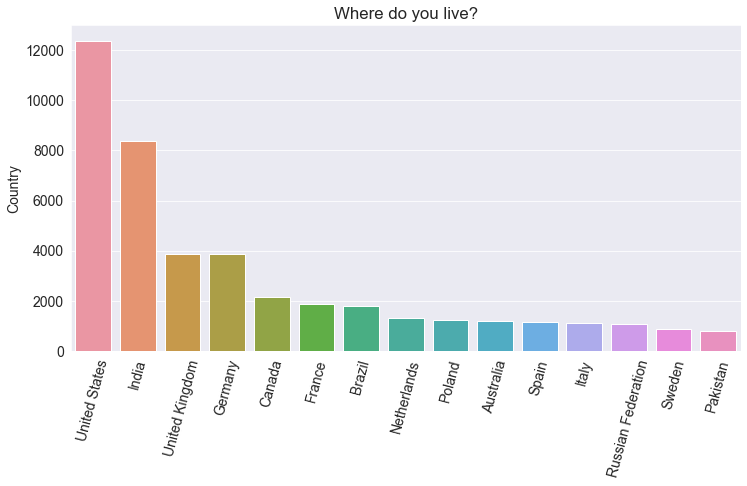

In [43]:
# plot top countries 
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)

It looks that a high number of respondents are from the Unites States and India. It seems that the survey may not be representative of the global programming community - especially non-English speaking countries. Programmers from non-English speaking countries are almost probably underrepresented.

View the distribution of respondents' age.

In [44]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

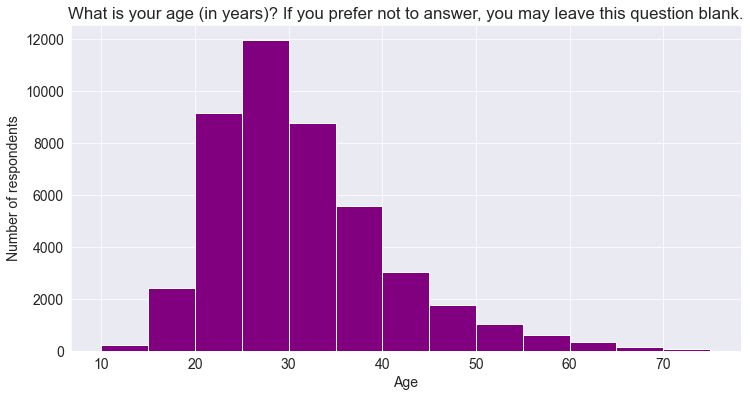

In [45]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel("Age")
plt.ylabel("Number of respondents")

plt.hist(survey_df.Age, bins=np.arange(10, 80, 5), color="purple")

It looks that a large percentage of respondents are 20-40 years old.

View the distribution of responses for the Gender.

In [46]:
schema.Gender 

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [47]:
gender_counts = survey_df.Gender.value_counts()
gender_counts 

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x59f0c37280>,
 [Text(1.0617335815722195, -0.28761398047005127, 'Man'),
  Text(-1.0544835403587842, 0.3131524598536697, 'Woman'),
  Text(-1.0996796455244597, 0.026545757084685317, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791274081303015, -0.1568803529836643, '91.6%'),
  Text(-0.5751728401957005, 0.17081043264745616, '7.7%'),
  Text(-0.5998252611951598, 0.014479503864373808, '0.8%')])

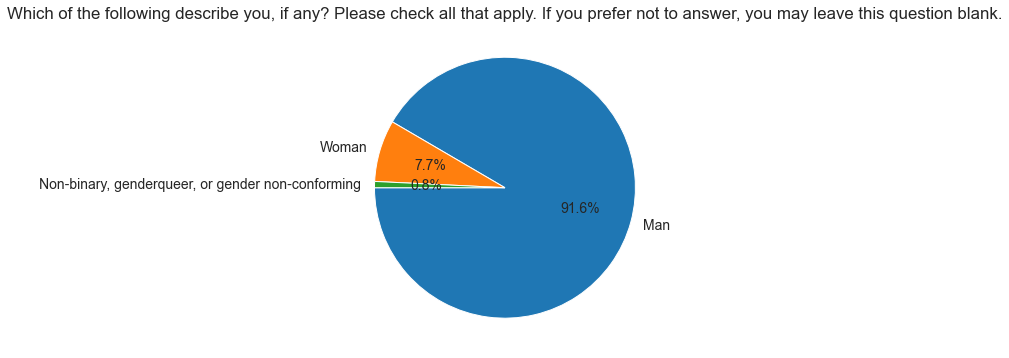

In [48]:
plt.figure(figsize=(12, 6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180)

Only about 8% of survey respondents who have answered the question identify as women or non-binary. (Avg. is 12%)

Compare the education levels of respondents.

In [49]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [50]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

Text(0, 0.5, '')

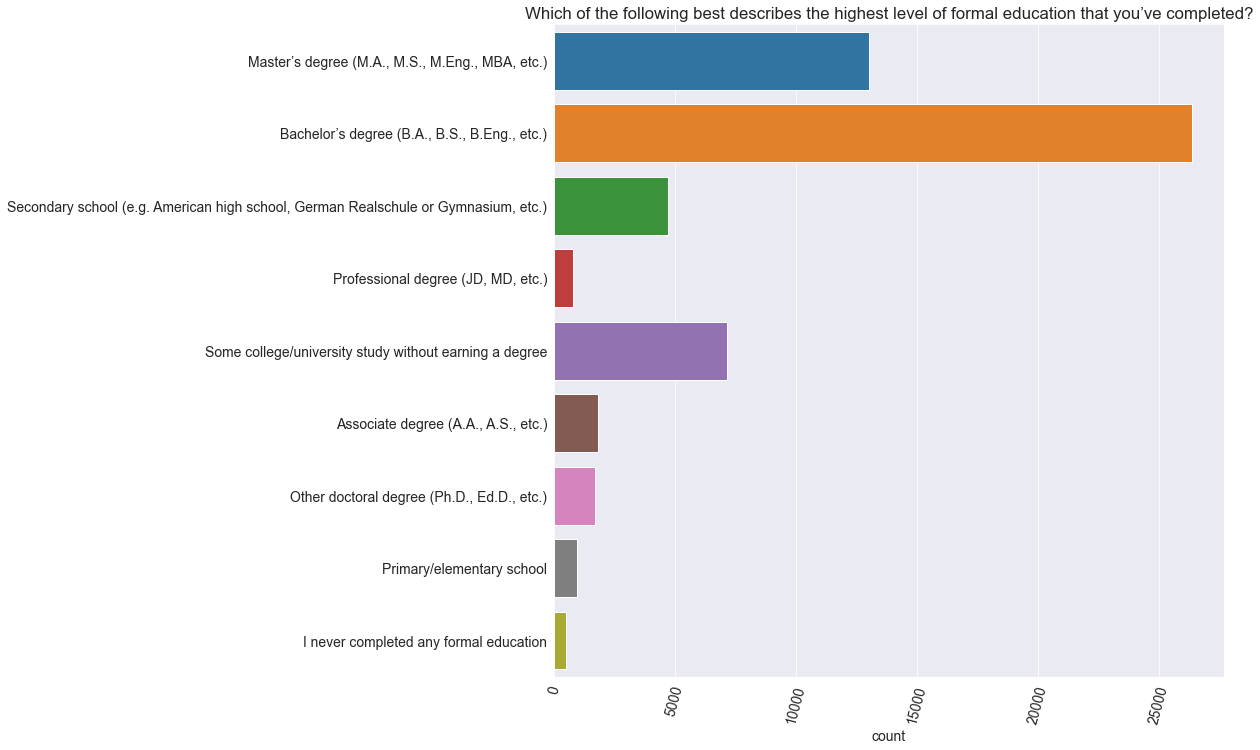

In [51]:
plt.figure(figsize=(12, 12))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema.EdLevel)
plt.ylabel(None)

More than half of the respondents hold a bachelor's or master's degree.

Plot undergraduate majors, but I'll convert numbers into percentages and sort values to make it easier to visualize.

In [52]:
schema.UndergradMajor

'What was your primary field of study?'

Text(0, 0.5, '')

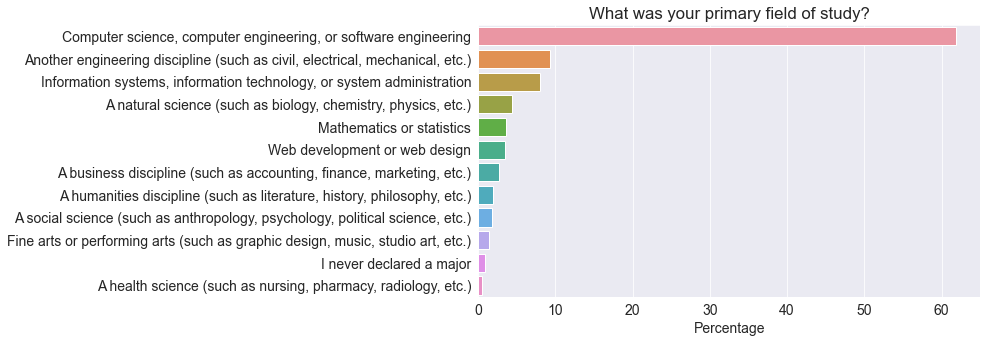

In [53]:
undergrad_pct = survey_df.UndergradMajor.value_counts() / survey_df.UndergradMajor.count() * 100

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel("Percentage")
plt.ylabel(None)

Around 40% of respondents have non-computer science degrees.

Visualize `Employment` to compare the breakdown between full-time, part-time, and freelance work.

In [55]:
schema.Employment

'Which of the following best describes your current employment status?'

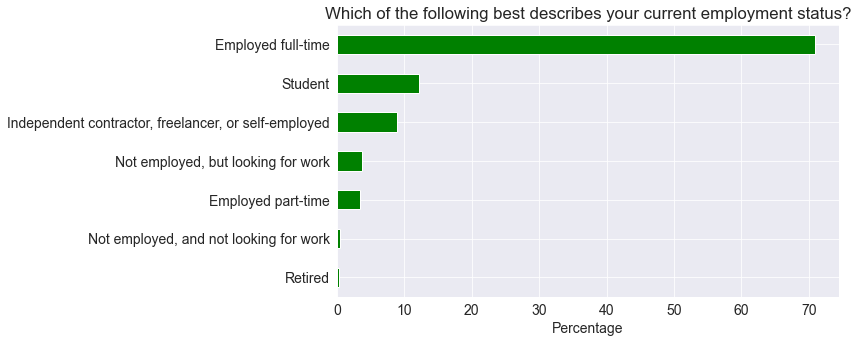

In [73]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

### Inferences and Conclusions

I've drawn many inferences from the survey. Here are some of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women and non-binary genders.


- The programming community is not as diverse as it can be. Although this is improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Thus, a computer science degree isn't compulsory for learning to code or building a career in programming.


- A significant percentage of programmers either work part-time or as freelancers.


- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.